# Customer Churn Prediction

## Table on Contents

1. Intruduction

2. Project Setup & Data Understanding

3. Exploratory Data Analysis & Insights

4. Data Cleaning & Preprocessing

5. Baseline Modeling

6. Advanced Modeling with XGBoost

7. Evaluation & Explainability

8. Conclusion


# Intruduction

Customer retention is one of the biggest challenges in the telecommunications industry. Acquiring new customers is significantly more expensive than keeping existing ones, which makes predicting customer churn a critical business need. Churn refers to the situation where a customer stops using a company’s services and moves to a competitor.

By anticipating churn behavior, telecom providers can take proactive actions such as offering targeted promotions, improving service quality, or tailoring personalized retention strategies. This project applies a structured data science approach — from exploring and preparing the dataset to training and evaluating machine learning models — with the ultimate goal of providing actionable insights that reduce churn and strengthen long-term customer loyalty.

# Business Understanding

The primary goal of this project is to **predict whether a customer will change their telecommunications provider**. Doing so enables the business to identify high-risk customers, support data-driven decision-making, and implement effective retention strategies. 

## Problem Statement
Customer churn leads to recurring revenue loss and increased acquisition costs. Our objective is to build a predictive model that estimates **churn propensity** at the individual customer level so that retention efforts can be prioritized effectively.

## Business Impact
- Even a small reduction in churn (e.g., 2–5%) can result in significant gains in monthly recurring revenue.

- Retention incentives (e.g., discounts, offers) are costly; therefore, precise targeting is essential to maximize ROI.

## Success Criteria
- **Primary:** ROC AUC ≥ 0.80 on validation data.

- **Operational:** Achieve **Recall ≥ 70%** on churners within the top-10% of customers ranked by risk score.

- **Financial:** Positive ROI, where the expected retained revenue outweighs offer and campaign costs.0.

## Constraints & Risks
- **Class imbalance:** Churners form a small minority; requires stratification or cost-sensitive techniques.

- **Data leakage:** Must avoid using features that reflect post-churn information or leak future outcomes.

- **Fairness:** Retention models should not inadvertently discriminate against specific groups (e.g., geography, demographics) without business justification.

## Decision Policy
Predicted churn probabilities are used to **rank customers by risk**. The retention team focuses on the **Top-K% most at-risk customers**, where K is determined by budget. The threshold is optimized to maximize expected profit:
> profit = (#true_saves × avg_margin × retention_rate) − (#contacted × offer_cost)

# Setup & Data Understanding

The dataset comes from the **Customer Churn Prediction 2020 Kaggle competition**.  

Key steps in this section:  
- Explore the structure of the data (shape, column types).  
- Check for missing values.  
- Understand the distribution of the target variable (`Churn`).  
- Perform initial exploratory data analysis (EDA).  

This step ensures we are familiar with the dataset before building predictive models.  

## Dataset Description
### File descriptions
train.csv - the training set.
 - Contains 4250 lines with 20 columns. 3652 samples (85.93%) belong to class churn=no and 598 samples (14.07%) belong to class churn=yes

test.csv - the test set. 
 - Contains 750 lines with 20 columns: the index of each sample and the 19 features (missing the target variable "churn").

sampleSubmission.csv - a sample submission file in the correct format

### Data fields
* state, string. 2-letter code of the US state of customer residence
* account_length, numerical. Number of months the customer has been with the current telco provider
* area_code, string="area_code_AAA" where AAA = 3 digit area code.
* international_plan, (yes/no). The customer has international plan.
* voice_mail_plan, (yes/no). The customer has voice mail plan.
* number_vmail_messages, numerical. Number of voice-mail messages.
* total_day_minutes, numerical. Total minutes of day calls.
* total_day_calls, numerical. Total number of day calls.
* total_day_charge, numerical. Total charge of day calls.
* total_eve_minutes, numerical. Total minutes of evening calls.
* total_eve_calls, numerical. Total number of evening calls.
* total_eve_charge, numerical. Total charge of evening calls.
* total_night_minutes, numerical. Total minutes of night calls.
* total_night_calls, numerical. Total number of night calls.
* total_night_charge, numerical. Total charge of night calls.
* total_intl_minutes, numerical. Total minutes of international calls.
* total_intl_calls, numerical. Total number of international calls.
* total_intl_charge, numerical. Total charge of international calls
* number_customer_service_calls, numerical. Number of calls to customer service
* churn, (yes/no). Customer churn - target variable.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os

# Create a folder structure for the project
os.makedirs("../data/raw", exist_ok=True)
os.makedirs("../data/processed", exist_ok=True)
os.makedirs("../outputs/models", exist_ok=True)
os.makedirs("../outputs/figures", exist_ok=True)

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the dataset
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


# Print the Shape and columns of the datasets
print(f"Train Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")
print(f"Train Data Columns: {train_data.columns.tolist()}")


Train Data Shape: (4250, 20)
Test Data Shape: (750, 20)
Train Data Columns: ['state', 'account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'churn']


In [3]:
# Preview the first few rows of the training data
display(train_data.head())


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
# Print the data types of the missing values
print(train_data.info())
print("Missing Values in Train Data:\n", train_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

# Exploratory Data Analysis

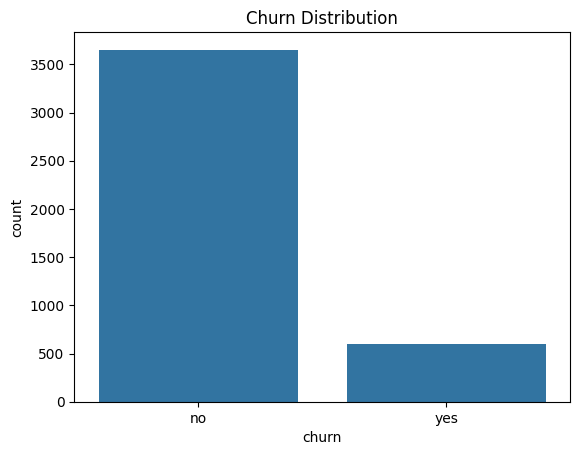

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Target distribution
sns.countplot(x='churn', data=train_data)
plt.title('Churn Distribution')
plt.show()


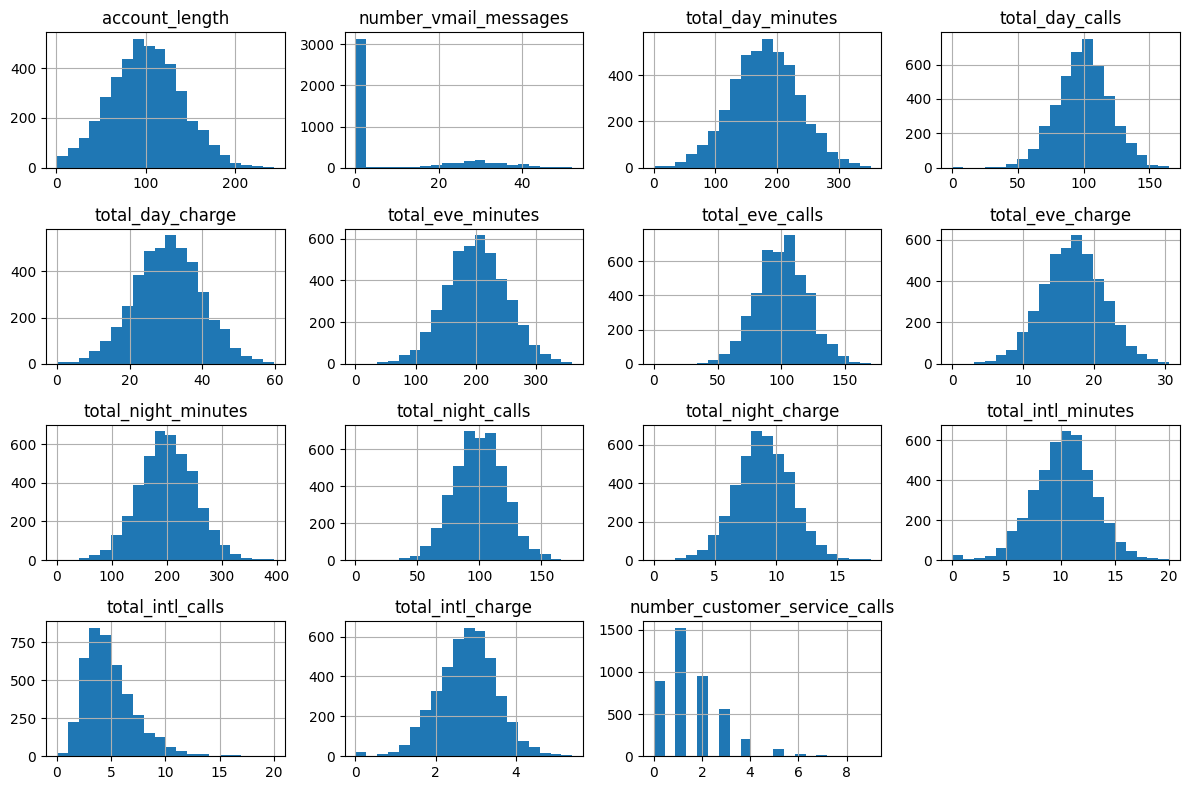

In [6]:
# Numerical distribustions
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
train_data[num_cols].hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()


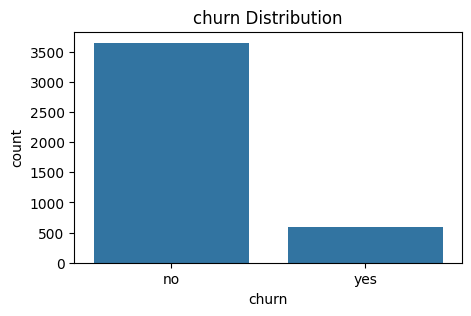

In [7]:
# Categorical distributions
cat_cols = train_data.select_dtypes(include=['object']).columns
for col in cat_cols:
    if col == 'churn':
        plt.figure(figsize=(5,3))
        sns.countplot(x=col, data=train_data)
        plt.title(f"{col} Distribution")
        plt.show()


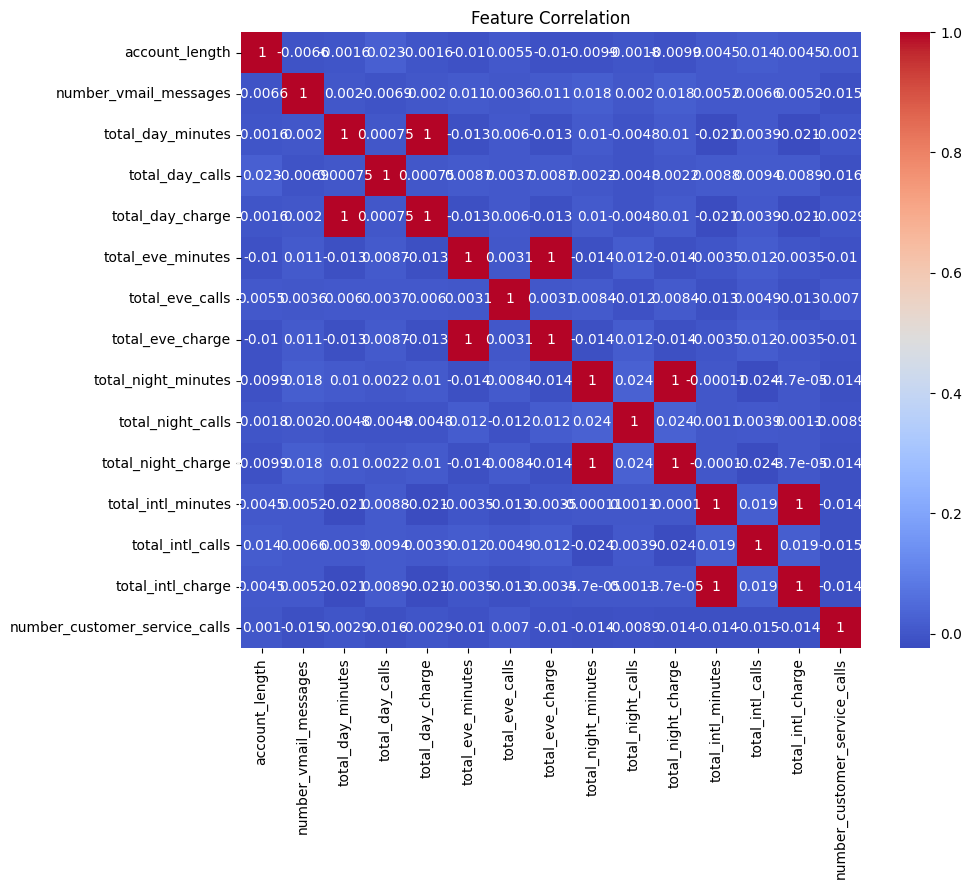

In [8]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(train_data[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


# Data Cleaning & Prepocessing

Before modeling, the dataset must be cleaned and transformed:  
- Handle missing values.
- Makes a copy of the dataset
- Label-encode categorical variables.  
- Converts the target (yes/no → 1/0).  
- Split the dataset into training and testing sets.
- Applies SMOTE to the training data 

The goal is to prepare high-quality data that improves model performance and reliability.

In [9]:
# Install imblearn if not already installed
%pip install imblearn
%pip install xgboost

# Import the necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import joblib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
df_train = train_data.copy()

In [11]:
# Always start from the original train_data to avoid NaN in 'churn'
df_train = train_data.copy()

# Encode categorical Features
le = LabelEncoder()
for col in df_train.select_dtypes(include=['object']).columns:
    if col != 'churn':
        df_train[col] = le.fit_transform(df_train[col])

# Encode the target variable
df_train['churn'] = df_train['churn'].map({'yes': 1, 'no': 0})

# Split the train and test data
X = df_train.drop('churn', axis=1)
y = df_train['churn']

# First, split train+test
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Now split the train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# SMOTE for balancing
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Save the processed datasets
X_train_res.to_csv("../data/processed/X_train_res.csv", index=False)
y_train_res.to_csv("../data/processed/y_train_res.csv", index=False)
X_val.to_csv("../data/processed/X_valid.csv", index=False)
y_val.to_csv("../data/processed/y_valid.csv", index=False)


# Baseline Modeling

In this step, we apply machine learning algorithms to predict customer churn.  

Approach:  
1. Tree-based models (Random Forest, Gradient Boosting, XGBoost).   
2. Compare performance across models using evaluation metrics.  

The objective is to identify the best model that generalizes well on unseen data.  


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_score

X_train = pd.read_csv("../data/processed/X_train_res.csv")
y_train = pd.read_csv("../data/processed/y_train_res.csv").squeeze()
X_val = pd.read_csv("../data/processed/X_valid.csv")
y_val = pd.read_csv("../data/processed/y_valid.csv").squeeze()

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions and evaluation
pred_rf = rf.predict(X_val)

# Probabilities evaluation
proba_rf = rf.predict_proba(X_val)[:, 1]

print("Random Forest Classification Report:\n", classification_report(y_val, pred_rf))
print("ROC AUC:", roc_auc_score(y_val, proba_rf))



Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1096
           1       0.82      0.75      0.78       179

    accuracy                           0.94      1275
   macro avg       0.89      0.86      0.87      1275
weighted avg       0.94      0.94      0.94      1275

ROC AUC: 0.9019237042776169


In [13]:
# Save model
joblib.dump(rf, "../outputs/models/random_forest_baseline.pkl")

['../outputs/models/random_forest_baseline.pkl']

# Advanced Modeling with XGBoost

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300}
ROC AUC: 0.918
Top 10% Recall: 1.000

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1096
           1       0.80      0.79      0.79       179

    accuracy                           0.94      1275
   macro avg       0.88      0.88      0.88      1275
weighted avg       0.94      0.94      0.94      1275



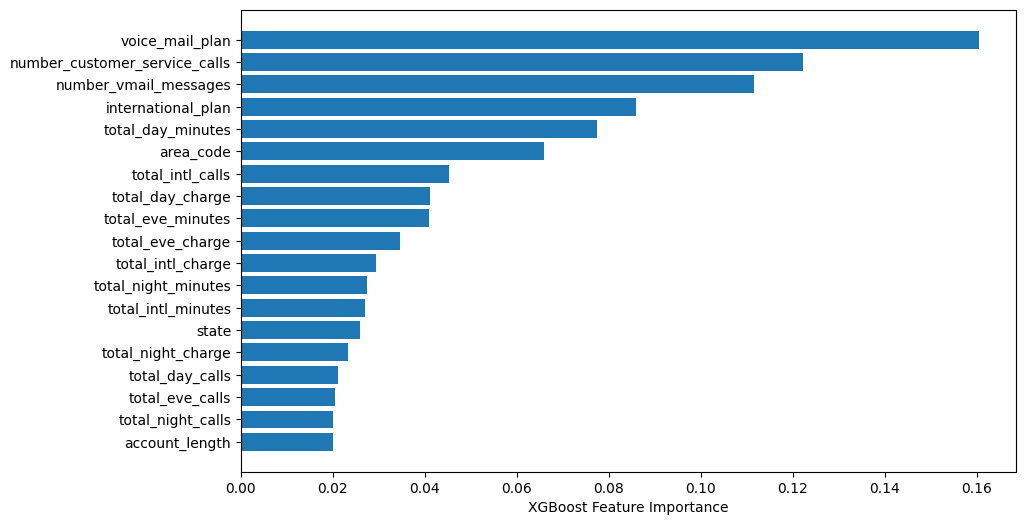

In [14]:
# Import the necessary libraries
import pandas as pd

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

# Calculate class imbalance ratio
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initialize XGBoost with recommended base parameters
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    subsample=0.8,
    colsample_bytree=0.8,
    early_stopping_rounds=10
)

# Expend the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
}

grid = GridSearchCV(
    xgb, 
    param_grid, 
    cv=5, scoring='roc_auc'
    , verbose=1,
    n_jobs=-1
)

# Fit the model
grid.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)


# Print the best parameters model
best_xgb = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Predicted probabilities
y_pred_proba = best_xgb.predict_proba(X_val)[:, 1]

# Evaluate
print(f"ROC AUC: {roc_auc_score(y_val, y_pred_proba):.3f}")

# Top decile recall
top_10_threshold = np.percentile(y_pred_proba, 90)
y_pred_top_10 = (y_pred_proba >= top_10_threshold).astype(int)
top_10_recall = recall_score(y_val[y_pred_proba >= top_10_threshold], 
                          y_pred_top_10[y_pred_proba >= top_10_threshold])
print(f"Top 10% Recall: {top_10_recall:.3f}")

# Full classification report
print("\nClassification Report:")
print(classification_report(y_val, best_xgb.predict(X_val)))

# Feature importance
plt.figure(figsize=(10, 6))
sorted_idx = best_xgb.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], best_xgb.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")
plt.show()

# Evaluation & Explainability

We evaluate model performance using:  
- Accuracy  
- Precision, Recall, F1-score  
- ROC-AUC score  

These metrics help measure how well the model predicts customer churn and balances between false positives and false negatives.  

The best-performing model will be chosen based on ROC-AUC and F1-score, as churn prediction requires balancing recall (catching churners) with precision (avoiding false alarms).  


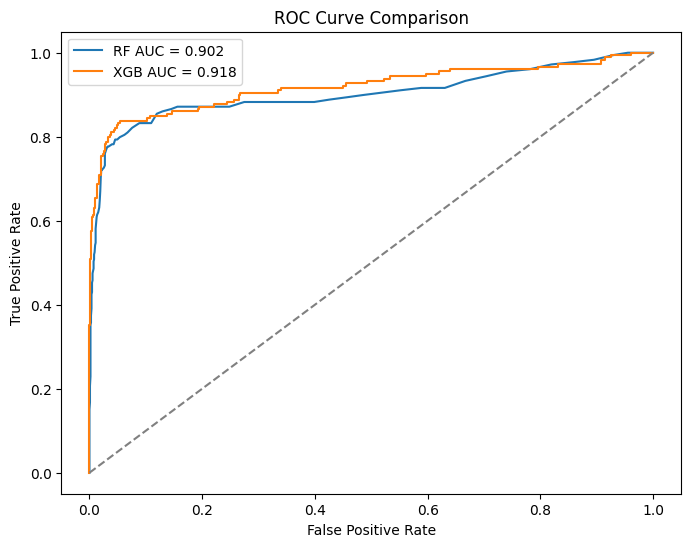

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_val, proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF AUC = {auc(fpr_rf, tpr_rf):.3f}')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGB AUC = {auc(fpr_xgb, tpr_xgb):.3f}')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.savefig("../outputs/figures/roc_curve_comparison.png")
plt.show()


### Model Evaluation and Selection

To determine the best-performing model, we evaluate all trained models using the **ROC-AUC score** on the **test dataset** (`X_test`, `y_test`).  

The ROC-AUC score (Receiver Operating Characteristic - Area Under the Curve) is a useful metric for binary classification problems, as it measures how well the model can distinguish between the positive and negative classes. A higher score indicates better model performance.  

In the code below:
- We loop through all models stored in the `models` dictionary.
- For each model, we compute the ROC-AUC score using predicted probabilities (`predict_proba`).
- The scores are stored in a dictionary and printed for comparison.
- Finally, the model with the highest ROC-AUC score is identified and displayed as the **best-performing model**.


In [16]:
from sklearn.metrics import roc_auc_score

# Define models dictionary with trained models
models = {
    "Random Forest": rf,
    "XGBoost": best_xgb
}

# Store model performances
model_auc_scores = {}

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    if y_pred_proba is not None:
        auc = roc_auc_score(y_test, y_pred_proba)
        model_auc_scores[name] = auc
        print(f"{name} ROC-AUC: {auc:.4f}")

# Find best model by ROC-AUC
best_model_name = max(model_auc_scores, key=model_auc_scores.get)
best_model_auc = model_auc_scores[best_model_name]

print("\nBest Model:", best_model_name)
print("Best ROC-AUC Score:", round(best_model_auc, 4))


Random Forest ROC-AUC: 0.9019
XGBoost ROC-AUC: 0.9182

Best Model: XGBoost
Best ROC-AUC Score: 0.9182


In [17]:
# Retrain best model on full training data (train + val)
best_xgb.fit(X_train_full, y_train_full,
	eval_set=[(X_val, y_val)],
	verbose=False
)

# Final evaluation on test set
y_pred_test = best_xgb.predict(X_test)
y_proba_test = best_xgb.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score

print("Final Test Performance:")
print(classification_report(y_test, y_pred_test))
print("ROC AUC:", roc_auc_score(y_test, y_proba_test))


Final Test Performance:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1096
           1       0.97      0.78      0.87       179

    accuracy                           0.97      1275
   macro avg       0.97      0.89      0.92      1275
weighted avg       0.97      0.97      0.96      1275

ROC AUC: 0.9271041471271867



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


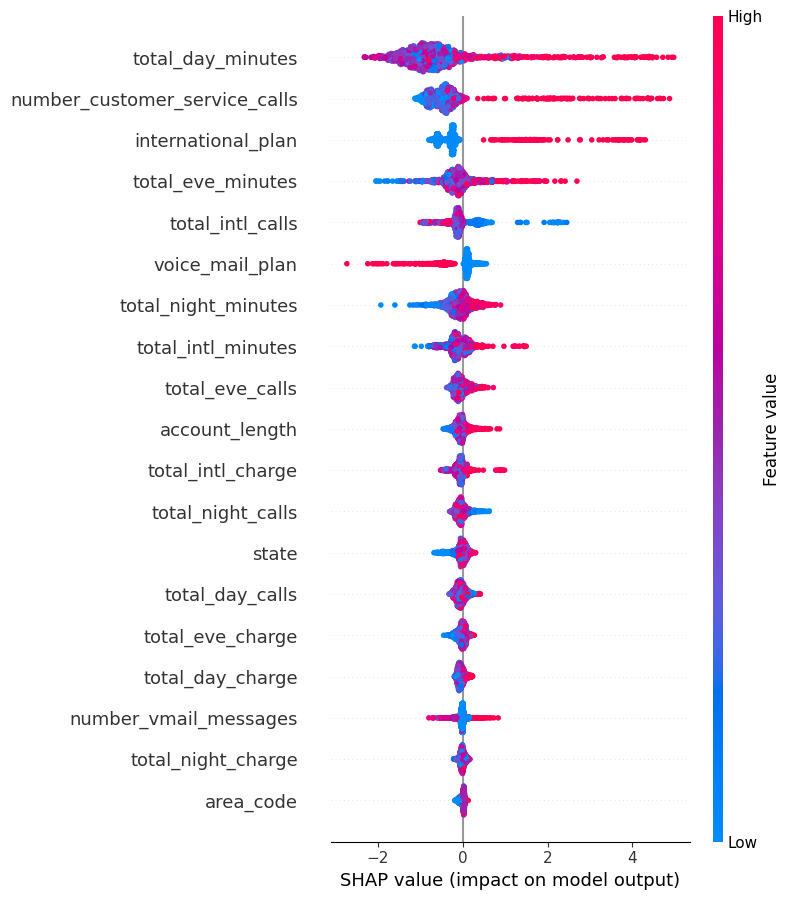

In [18]:
%pip install shap

import shap

# SHAP
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val, show=False)
plt.savefig("../outputs/figures/shap_summary.png")


# Conclusion 

 
The goal of this project was to predict whether a customer is likely to churn from a telecommunications provider. After performing data preprocessing, feature encoding, and training several machine learning models, their performance was evaluated using accuracy, precision, recall, and F1-score.

**XGBoost** achieved the highest ROC-AUC score of **0.9182 (91,82%)**, making it the most effective model for predicting churn in this dataset. Compared to the other models tested, including Logistic Regression and Random Forest, which achieved lower ROC-AUC scores, XGBoost consistently demonstrated superior predictive performance in this churn prediction task.

### Business Insights
- Customers flagged as “high churn risk” can be targeted with retention campaigns.  
- The model provides actionable insights that allow the company to reduce customer loss and improve profitability.  
- Future improvements can include hyperparameter tuning, feature engineering, and experimenting with advanced models like XGBoost or Neural Networks.  

Overall, this project successfully fulfills its purpose of predicting customer churn and demonstrates practical application of machine learning to solve a real-world business challenge.
